# Homework 1 - Anomaly Detection Challenges 2016/2017
### Miguel Sandim

In [1]:
# Configurations
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
%matplotlib inline

# From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 0. Loading the data and transforming it into a pandas dataframe:

In [2]:
# Load the data
import scipy.io
data_mat = scipy.io.loadmat("data/oc_514.mat")

In [3]:
type(data_mat['x'])

scipy.io.matlab.mio5_params.MatlabObject

In [4]:
data_mat = data_mat['x'][0,0]

In [5]:
for i,x in enumerate(data_mat):
    print(i)
    print(type(x))
    print(x)
    print("**************************************************************************")

0
<class 'numpy.ndarray'>
[[  75.     0.   190.  ...,    2.9   23.3   49.4]
 [  56.     1.   165.  ...,    2.1   20.4   38.8]
 [  54.     0.   172.  ...,    3.4   12.3   49. ]
 ..., 
 [  36.     0.   166.  ...,    1.   -44.2  -33.2]
 [  32.     1.   155.  ...,    2.4   25.    46.6]
 [  78.     1.   160.  ...,    1.6   21.3   32.8]]
**************************************************************************
1
<class 'numpy.ndarray'>
[[array(['outlier', 'target '], 
      dtype='<U7')
  array([[ 0.43571429,  0.56428571]]) array([], shape=(0, 0), dtype=uint8)
  array(['crisp'], 
      dtype='<U5')]
 [array(['default'], 
      dtype='<U7') array([[1]], dtype=uint8)
  array([[0]], dtype=uint8) array([], shape=(1, 0), dtype=float64)]]
**************************************************************************
2
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 

### For what I understood this structure has the following contents:
- Index 0 has the features' values
- Index 2 has the class values for each instance
- Index 5 has the features' names

In [6]:
dataset = pd.DataFrame(np.hstack((data_mat[0],data_mat[2])), columns = np.append([x.strip() for x in data_mat[5]], ["class"]))

In [7]:
dataset["class"] = dataset["class"].astype("category")
dataset["class"].cat.rename_categories(["anomaly", "ok"], inplace = True)

In [8]:
dataset

,age,sex,height,weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6-Q wave ampl,V6-R wave ampl,V6-S wave ampl,V6-R' wave ampl,V6-S' wave ampl,V6-P wave ampl,V6-T wave ampl,V6-QRSA sum,V6-QRSTA,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,anomaly
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,anomaly
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,anomaly
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,ok
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,anomaly
5,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,ok
6,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,ok
7,44.0,0.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,ok
8,50.0,1.0,167.0,67.0,89.0,130.0,383.0,156.0,73.0,85.0,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,anomaly
9,62.0,0.0,170.0,72.0,102.0,135.0,401.0,156.0,83.0,72.0,...,-0.5,9.0,-2.0,0.0,0.0,0.8,0.9,12.3,19.3,anomaly


In [9]:
dataset.describe()

,age,sex,height,weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6-JJ wave ampl,V6-Q wave ampl,V6-R wave ampl,V6-S wave ampl,V6-R' wave ampl,V6-S' wave ampl,V6-P wave ampl,V6-T wave ampl,V6-QRSA sum,V6-QRSTA
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.0,420.000000,420.000000,420.000000,420.000000
mean,46.050000,0.559524,166.159524,67.657143,88.900000,158.935714,367.559524,170.166667,91.876190,33.273810,...,-0.282381,-0.274762,9.022619,-1.487143,0.003095,0.0,0.544286,1.270952,19.109524,29.618333
std,16.387168,0.497036,38.496515,16.633967,15.651774,36.612571,33.129078,35.837885,21.822541,46.094422,...,0.606901,0.530125,3.452782,2.046704,0.045984,0.0,0.323009,1.410061,13.651475,18.584817
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,111.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,143.000000,350.000000,148.000000,79.750000,2.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.600000,11.100000,17.750000
50%,46.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.500000,162.500000,91.000000,40.000000,...,-0.200000,0.000000,8.700000,-1.200000,0.000000,0.0,0.500000,1.400000,18.000000,28.100000
75%,58.000000,1.000000,170.000000,78.000000,94.000000,174.000000,384.000000,178.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.800000,41.225000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


### 2.0 is a normal occurance, 1.0 is a

In [10]:
dataset["class"].value_counts()

ok         237
anomaly    183
Name: class, dtype: int64

### The feature we have:

In [11]:
dataset.columns.tolist()

['age',
 'sex',
 'height',
 'weight',
 'QRS duration',
 'P-R interval',
 'Q-T interval',
 'T interval',
 'P interval',
 'QRS',
 'T',
 'P',
 'QRST',
 'heartrate',
 'DI-Q wave width',
 'DI-R wave width',
 'DI-S wave width',
 "DI-R' wave width",
 "DI-S' wave width",
 'DI-number of intrinsic deflections',
 'DI-ragged R wave',
 'DI-diphasic derivation of R wave',
 'DI-ragged P wave',
 'DI-diphasic derivation of P wave',
 'DI-ragged T wave',
 'DI-diphasic derivation of T wave',
 'DII-Q wave width',
 'DII-R wave width',
 'DII-S wave width',
 "DII-R' wave width",
 "DII-S' wave width",
 'DII-number of intrinsic deflections',
 'DII-ragged R wave',
 'DII-diphasic derivation of R wave',
 'DII-ragged P wave',
 'DII-diphasic derivation of P wave',
 'DII-ragged T wave',
 'DII-diphasic derivation of T wave',
 'DIII-Q wave width',
 'DIII-R wave width',
 'DIII-S wave width',
 "DIII-R' wave width",
 "DIII-S' wave width",
 'DIII-number of intrinsic deflections',
 'DIII-ragged R wave',
 'DIII-diphasic deri

In [12]:
dataset.ix[:,:"class"]

,age,sex,height,weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6-Q wave ampl,V6-R wave ampl,V6-S wave ampl,V6-R' wave ampl,V6-S' wave ampl,V6-P wave ampl,V6-T wave ampl,V6-QRSA sum,V6-QRSTA,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,anomaly
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,anomaly
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,anomaly
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,ok
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,anomaly
5,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,ok
6,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,ok
7,44.0,0.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,ok
8,50.0,1.0,167.0,67.0,89.0,130.0,383.0,156.0,73.0,85.0,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,anomaly
9,62.0,0.0,170.0,72.0,102.0,135.0,401.0,156.0,83.0,72.0,...,-0.5,9.0,-2.0,0.0,0.0,0.8,0.9,12.3,19.3,anomaly


### Spliting the data for training/validation and test:

In [13]:
from sklearn.model_selection import train_test_split

X = dataset.ix[:,:278]
y = dataset.ix[:,278]

X_train, X_test, y_train, y_test = train_test_split(dataset.ix[:,:278], dataset.ix[:,278], test_size=0.3, random_state=0)
X_train_ok = X_train[y_train != "anomaly"]

print("X: %s Y: %s" % (X.shape, y.shape))

print("Train X: %s Y: %s" % (X_train.shape, y_train.shape))
print("Test X: %s Y: %s" % (X_test.shape, y_test.shape))

print("\nTraining set anomalies:\n%s" % y_train.value_counts())
print("\nTest set anomalies:\n%s" % y_test.value_counts())

X: (420, 278) Y: (420,)
Train X: (294, 278) Y: (294,)
Test X: (126, 278) Y: (126,)

Training set anomalies:
anomaly    133
ok         161
dtype: int64

Test set anomalies:
anomaly    50
ok         76
dtype: int64


### 1) KDE

In [14]:
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV

In [15]:
def calculateAnomaliesKDE():
    #hist = KernelDensity(kernel = "guassian", brandwith = 0.1)
    model = KernelDensity(kernel = "gaussian", bandwidth = 0.4)

    #model_parameters =  [{"bandwidth": np.arange(0.3, 10, 0.3)}]
    #model2 = GridSearchCV(model, model_parameters, cv=10)
    #model2.fit(X_train)
    #probs = np.exp(model2.best_estimator_.score_samples(X_test))
    #probs = model2.best_estimator_.score_samples(X_train)
    
    model.fit(X_train_ok)
    probs = np.exp(model.score_samples(X_test))

    #probs_train = np.exp(model.score_samples(X_train))
    #probs_test = np.exp(model.score_samples(X_test))
    #model.fit(X_train)

    #print("Probs train:\n%s\nProbs test:\n%s" % (probs_train, probs_test))
    return(probs) # TODO: return the classifications to evaluate

#fig = plt.figure()
#axes = fig.add_axes([0, 0, 3, 1])
#axes.set_xlim(0, 300)
#axes.scatter(np.arange(len(probs)), y_train.codes)

In [16]:
probs = calculateAnomaliesKDE()

#print("Probs train:\n%s\nProbs test:\n%s" % (probs_train, probs_test))
np.set_printoptions(precision=24)
print("Probs: %s" % probs)
#print("Probs unique: %s" % np.unique(probs))

# 

# Plot train
'''
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])
axes.plot(np.arange(len(probs)), probs)

axes.set_xlabel('Instances')
axes.set_ylabel('f(x)')
axes.set_title('PDF - data')

plt.show()'''

#plt.hist(probs, alpha=.3)
#sns.rugplot(probs);

# Plot test
#fig = plt.figure()

#axes = fig.add_axes([0, 0, 1, 1])
#axes.plot(np.arange(len(probs_test)), probs_test)

#axes.set_xlabel('Instances')
#axes.set_ylabel('f(x)')
#axes.set_title('PDF - test data')

#plt.show()'''

Probs: [  0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   1.682989863289788432696707e-19   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.000000000000000000000000e+00
   0.000000000000000000000000e+00   0.00000000000000000

"\nfig = plt.figure()\n\naxes = fig.add_axes([0, 0, 1, 1])\naxes.plot(np.arange(len(probs)), probs)\n\naxes.set_xlabel('Instances')\naxes.set_ylabel('f(x)')\naxes.set_title('PDF - data')\n\nplt.show()"

#### Falta arranjar uma maneira de isto dar classificações

#### Conclusions:
- Basicamente é um cocó

### 2) One-class SVM

In [31]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [53]:
model = svm.OneClassSVM(kernel="linear")
model.fit(X_train_ok)
y_pred = np.array(["ok" if y == -1 else "anomaly" for y in model.predict(X_test)])

array(['ok', 'anomaly', 'ok', 'anomaly', 'anomaly', 'ok', 'ok', 'anomaly',
       'ok', 'anomaly', 'ok', 'ok', 'anomaly', 'anomaly', 'anomaly', 'ok',
       'ok', 'ok', 'anomaly', 'anomaly', 'anomaly', 'ok', 'anomaly', 'ok',
       'anomaly', 'ok', 'anomaly', 'ok', 'ok', 'anomaly', 'anomaly', 'ok',
       'anomaly', 'ok', 'ok', 'anomaly', 'ok', 'anomaly', 'ok', 'ok', 'ok',
       'anomaly', 'ok', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'ok',
       'anomaly', 'anomaly', 'anomaly', 'ok', 'ok', 'ok', 'ok', 'anomaly',
       'ok', 'anomaly', 'ok', 'anomaly', 'ok', 'ok', 'anomaly', 'anomaly',
       'anomaly', 'anomaly', 'anomaly', 'anomaly', 'ok', 'ok', 'anomaly',
       'ok', 'anomaly', 'anomaly', 'anomaly', 'ok', 'anomaly', 'anomaly',
       'anomaly', 'anomaly', 'ok', 'ok', 'ok', 'anomaly', 'ok', 'ok',
       'anomaly', 'ok', 'ok', 'anomaly', 'anomaly', 'anomaly', 'anomaly',
       'ok', 'anomaly', 'anomaly', 'ok', 'ok', 'anomaly', 'ok', 'ok',
       'anomaly', 'ok', 'anomaly', 'ok

Confusion matrix, without normalization
[[30 20]
 [40 36]]


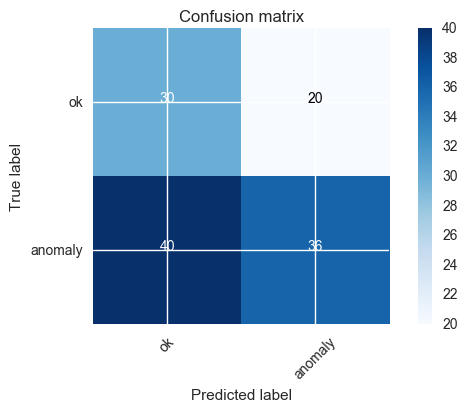

In [55]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes = ["ok", "anomaly"])

### 3) LOC